In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aisles = pd.read_csv(r"E:\project for portfolio\instacart-market-basket-analysis\instacart\aisles.csv")
orders = pd.read_csv(r"E:\project for portfolio\instacart-market-basket-analysis\instacart\orders.csv")
departments = pd.read_csv(r"E:\project for portfolio\instacart-market-basket-analysis\instacart\departments.csv")
order_products_prior = pd.read_csv(r"E:\project for portfolio\instacart-market-basket-analysis\instacart\order_products__prior.csv")
order_products_train = pd.read_csv(r"E:\project for portfolio\instacart-market-basket-analysis\instacart\order_products__train.csv")
products = pd.read_csv(r"E:\project for portfolio\instacart-market-basket-analysis\instacart\products.csv")

In [3]:
# print("total no. of unique item type of aisles: ",len(aisles))
# aisles.aisle
ais = aisles.duplicated()==False
# type(ais)
# ais.head()
aisles[ais]

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [4]:
departments.head(20)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [5]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
# print(orders["user_id"].nunique())
# col = {"Values":order.tolist()}
# df = pd.DataFrame(col)
# df.head(50)
# orders.head(20)

# Rows With duplicate values based on two columns user_id and order hour of day

In [7]:
"""By the following syntax i filtered out all the true values which are duplicate in the dataframe based on two columns only as of now
named as user_id and order_hour_of_day ......."""
print("Matrix shape for orders table: ",orders.shape)
order = orders.duplicated(["user_id","order_hour_of_day"])
orders[order]

Matrix shape for orders table:  (3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3,2254736,1,prior,4,4,7,29.0
5,3367565,1,prior,6,2,7,19.0
9,2550362,1,prior,10,4,8,30.0
10,1187899,1,train,11,4,8,14.0
13,1901567,2,prior,3,1,10,3.0
...,...,...,...,...,...,...,...
3421071,1542354,206209,prior,3,5,11,30.0
3421076,2129269,206209,prior,8,3,17,22.0
3421077,2558525,206209,prior,9,4,15,22.0
3421079,1854736,206209,prior,11,4,10,30.0


In [8]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [9]:
order_products_prior.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [10]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


# Data Cleaning

In [11]:
total = orders.isnull().sum()
# total = {"Attribute":total.index,"Count of Null values":total.tolist()}
# total = pd.DataFrame(total)
total

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [12]:
#checking for the percentage of null values
percentage = total / orders.isnull().count()
percentage

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060276
dtype: float64

In [13]:
missing_values = pd.concat([total,percentage],keys = ["Total","Percentage"],axis = 1)
# missing_values.index = missing_values["index"]
print("we can see that 6% of the values are null in days since prior order")
missing_values

we can see that 6% of the values are null in days since prior order


,Total,Percentage
order_id,0,0.000000
user_id,0,0.000000
eval_set,0,0.000000
order_number,0,0.000000
order_dow,0,0.000000
order_hour_of_day,0,0.000000
days_since_prior_order,206209,0.060276


In [14]:
orders_new = orders[orders.days_since_prior_order.notnull()]
orders_new

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [15]:
orders_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3214874 entries, 1 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 196.2+ MB


# Exploratory Data Analysis and Data Visualization

In [16]:
# count = orders[["user_id","eval_set"]].value_counts() "we also try this for practice"
count = orders_new["eval_set"].value_counts().reset_index()
count

,eval_set,count
0,prior,3008665
1,train,131209
2,test,75000


Text(0.5, 1.0, 'Eval_set breakdown in orders dataset')

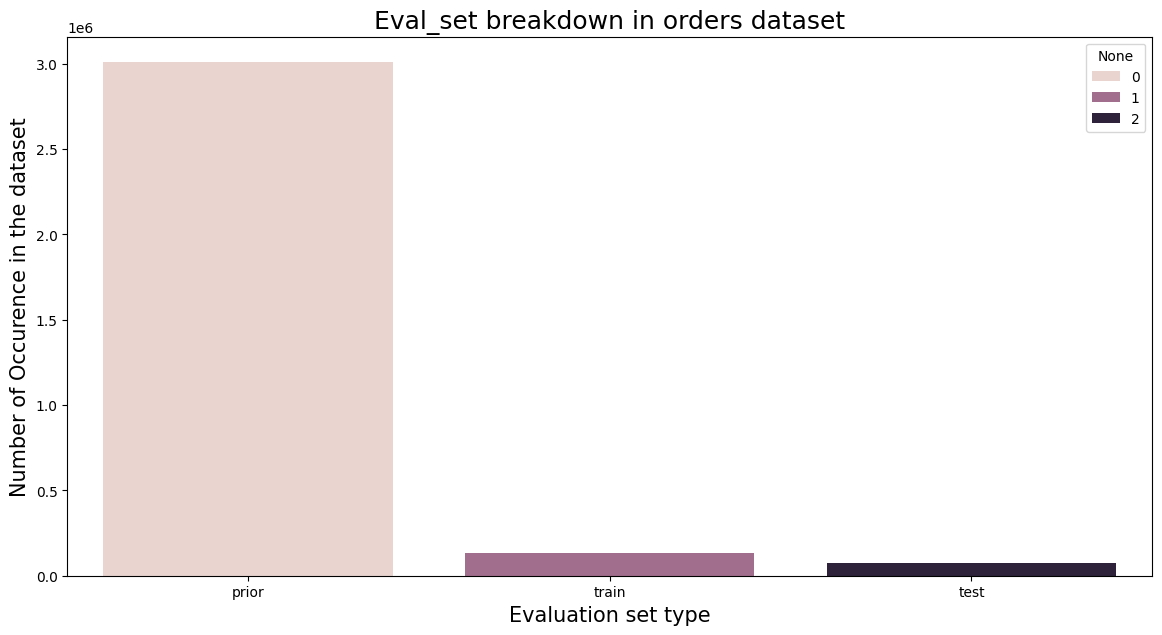

In [17]:
plt.figure(figsize=(14,7))
sns.barplot(x=count.eval_set,y=count['count'],hue = count.index)
plt.ylabel("Number of Occurence in the dataset",fontsize = 15)
plt.xlabel("Evaluation set type",fontsize = 15)
plt.title("Eval_set breakdown in orders dataset",fontsize = 18)
# plt.show()

In [18]:
count_hour_of_the_day = orders_new["order_hour_of_day"].value_counts()
count_hour_of_the_day

order_hour_of_day
10    271768
11    267812
15    266375
14    266007
13    261087
12    255846
16    255459
9     243452
17    214208
18    171133
8     168744
19    131383
20     97619
7      87227
21     73471
22     57605
23     37507
6      28956
0      21265
1      11636
5       9023
2       7010
4       5164
3       5117
Name: count, dtype: int64

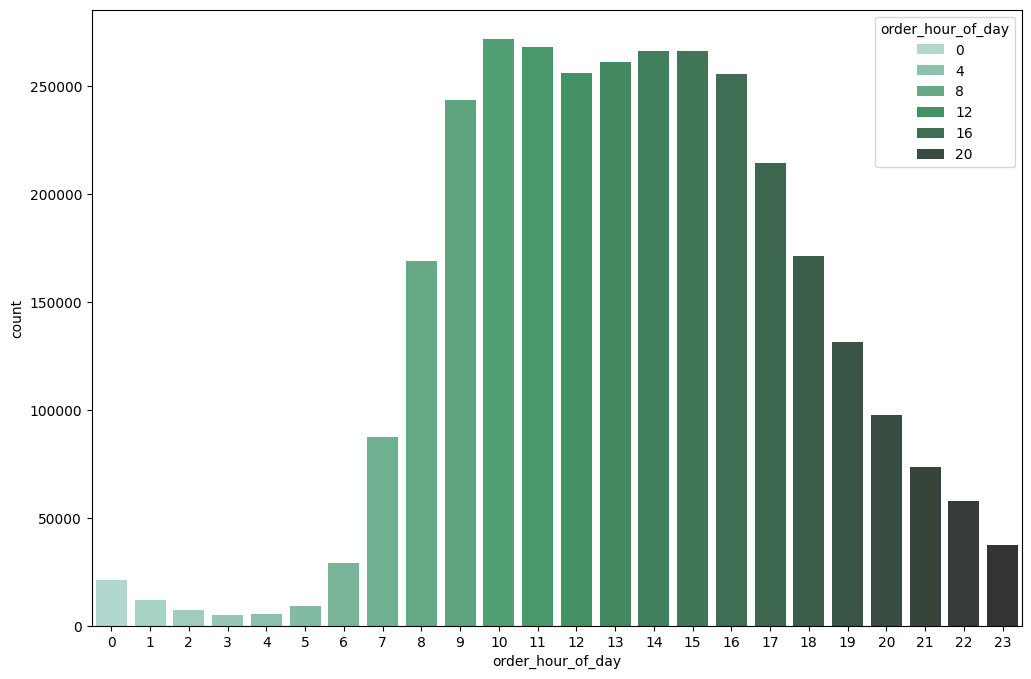

In [19]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_hour_of_day",data = orders_new,hue = "order_hour_of_day",palette="BuGn_d")

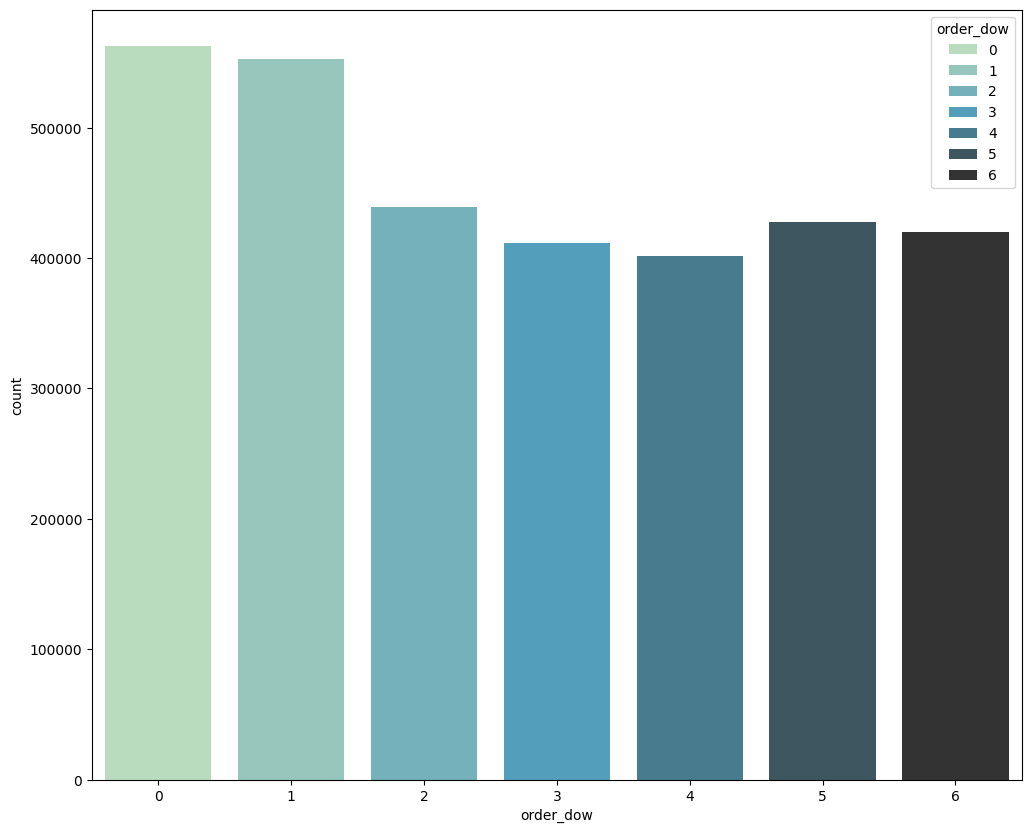

In [20]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x="order_dow",data=orders_new,hue="order_dow",palette="GnBu_d")

C:\Users\sagar\AppData\Local\Temp\ipykernel_3432\171059925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="order_hour_of_day",data=orders_new[orders_new["order_dow"]==0],palette="GnBu_d")


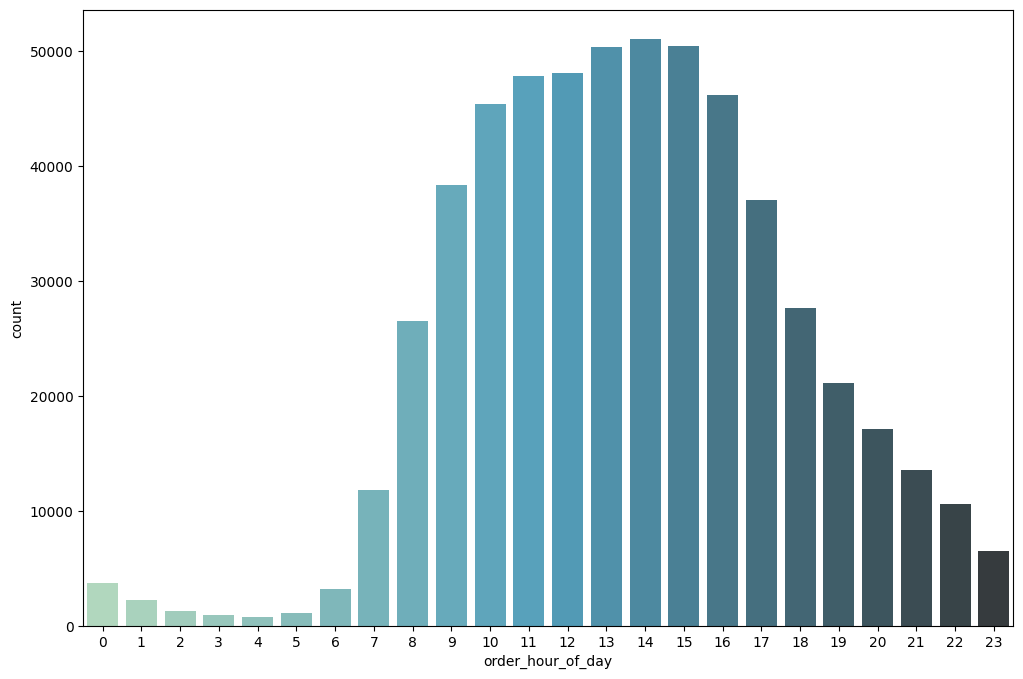

In [21]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_hour_of_day",data=orders_new[orders_new["order_dow"]==0],palette="GnBu_d")

C:\Users\sagar\AppData\Local\Temp\ipykernel_3432\4099413771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="order_hour_of_day",data=orders_new[orders_new["order_dow"]==1],palette="GnBu_d")


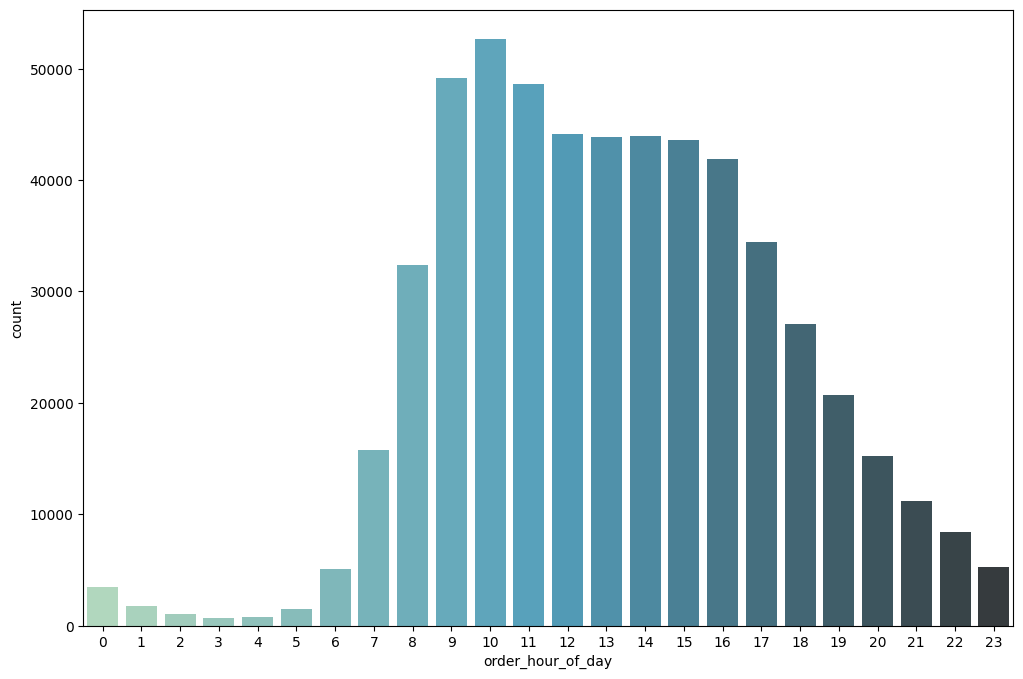

In [22]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_hour_of_day",data=orders_new[orders_new["order_dow"]==1],palette="GnBu_d")

C:\Users\sagar\AppData\Local\Temp\ipykernel_3432\2013184552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="order_hour_of_day",data=orders_new[orders_new["order_dow"]==2],palette="GnBu_d")


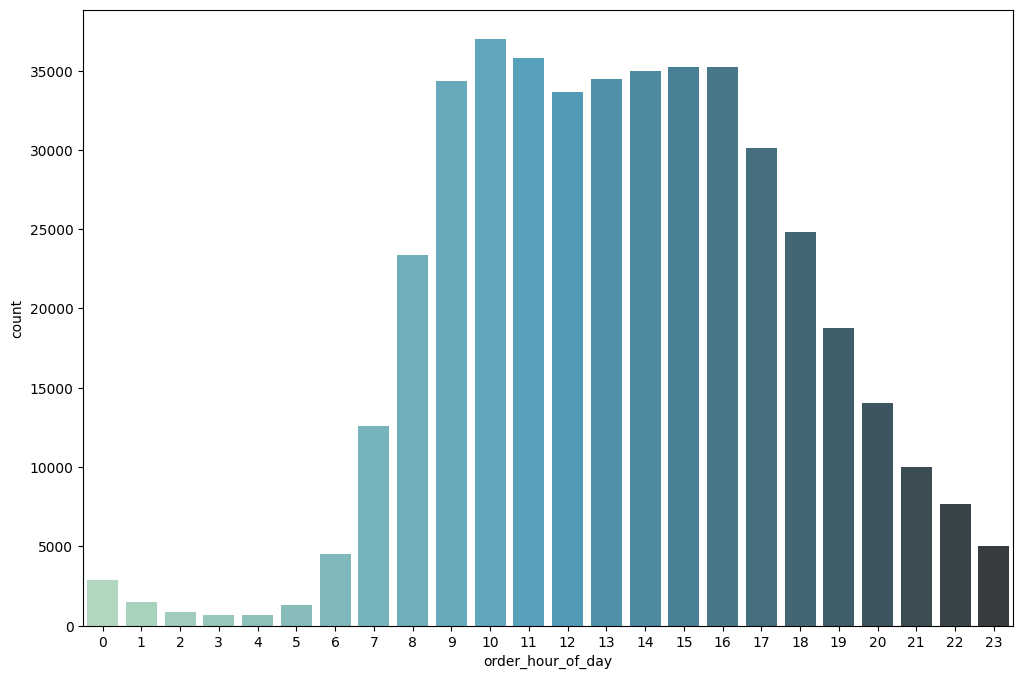

In [23]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_hour_of_day",data=orders_new[orders_new["order_dow"]==2],palette="GnBu_d")

C:\Users\sagar\AppData\Local\Temp\ipykernel_3432\3180570394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="order_hour_of_day",data=orders_new[orders_new["order_dow"]==3],palette="GnBu_d")


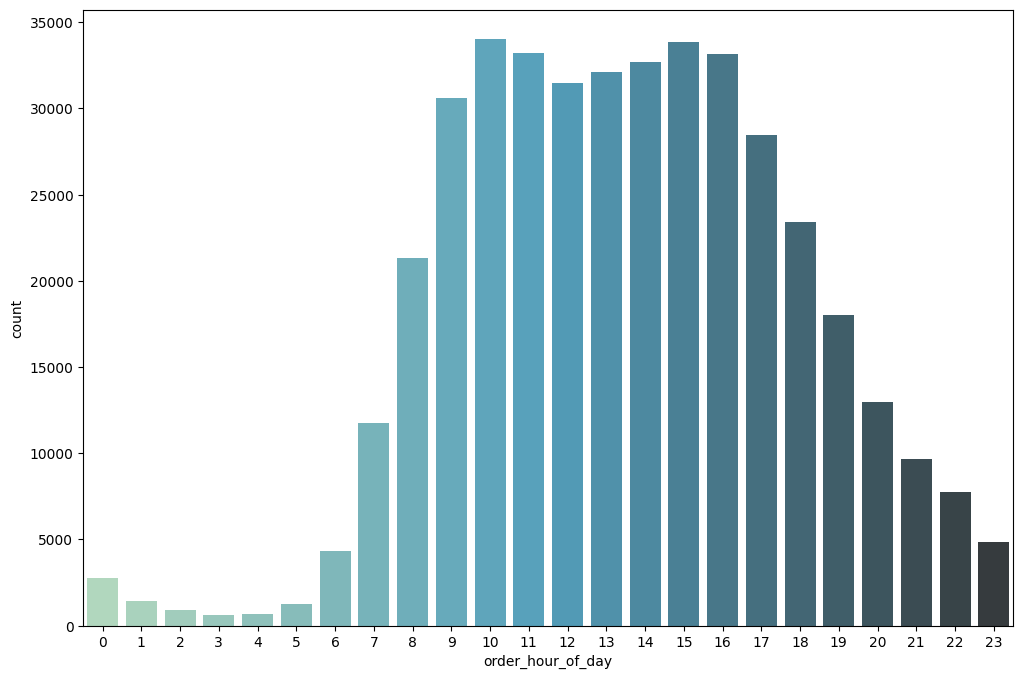

In [24]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_hour_of_day",data=orders_new[orders_new["order_dow"]==3],palette="GnBu_d")

C:\Users\sagar\AppData\Local\Temp\ipykernel_3432\2930982164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="order_hour_of_day",data=orders_new[orders_new["order_dow"]==4],palette="GnBu_d")


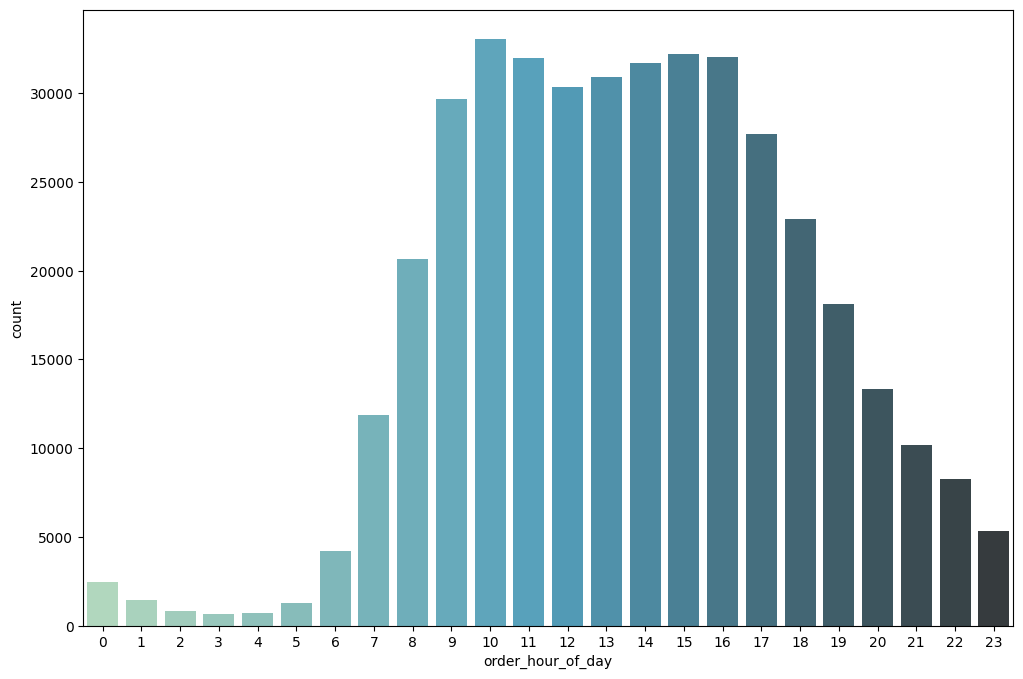

In [25]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_hour_of_day",data=orders_new[orders_new["order_dow"]==4],palette="GnBu_d")

C:\Users\sagar\AppData\Local\Temp\ipykernel_3432\551052328.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="order_hour_of_day",data=orders_new[orders_new["order_dow"]==5],palette="GnBu_d")


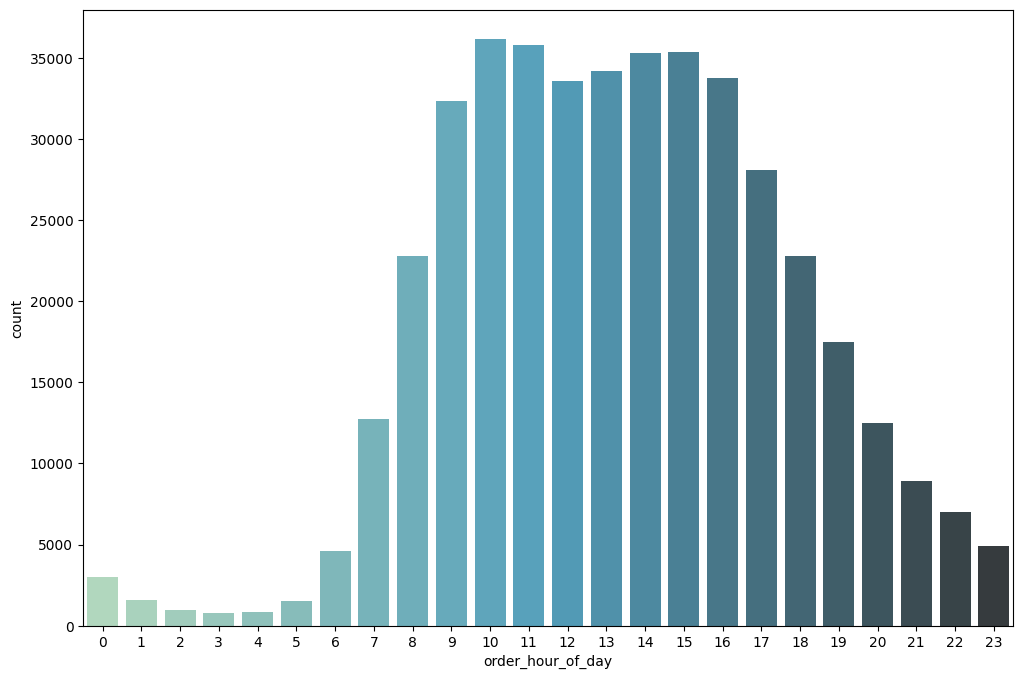

In [26]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_hour_of_day",data=orders_new[orders_new["order_dow"]==5],palette="GnBu_d")

C:\Users\sagar\AppData\Local\Temp\ipykernel_3432\2991470398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="order_hour_of_day",data=orders_new[orders_new["order_dow"]==6],palette="GnBu_d")


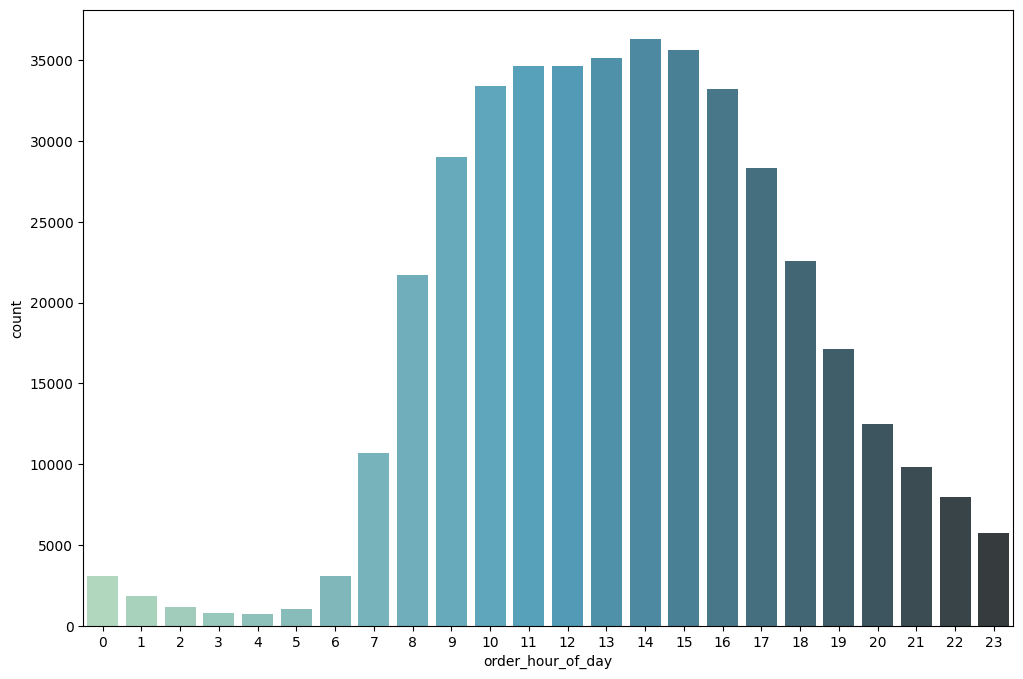

In [27]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_hour_of_day",data=orders_new[orders_new["order_dow"]==6],palette="GnBu_d")

In [28]:
grouped_orders = orders_new.groupby(["order_dow","order_hour_of_day"]).agg({"order_number":"count"}).reset_index()
grouped_orders.head(24)
# grouped_orders[grouped_orders["order_dow"]==6.head(24)
# orders_new["order_number"].nunique()

,order_dow,order_hour_of_day,order_number
0,0,0,3690
1,0,1,2245
2,0,2,1296
3,0,3,902
4,0,4,756
5,0,5,1093
6,0,6,3143
7,0,7,11762
8,0,8,26514
9,0,9,38363


In [29]:
grouped_orders = grouped_orders.pivot(index='order_dow',columns='order_hour_of_day',values=['order_number'])
grouped_orders

order_number                                           \
order_hour_of_day           0     1     2    3    4     5     6      7    
order_dow                                                                 
0                         3690  2245  1296  902  756  1093  3143  11762   
1                         3429  1723  1020  696  756  1523  5078  15725   
2                         2843  1472   878  683  696  1317  4511  12606   
3                         2760  1398   893  608  676  1279  4345  11775   
4                         2476  1415   841  644  695  1253  4184  11893   
5                         2987  1568   952  780  846  1502  4632  12770   
6                         3080  1815  1130  804  739  1056  3063  10696   

                                 ...                                     \
order_hour_of_day     8      9   ...     14     15     16     17     18   
order_dow                        ...                                      
0                  26514  38363  ...  51038  50427  46136  37056  27588   
1                  32382  49136  ...  43986  43590  41930  34407  27046   
2                  23343  34351  ...  34946  35249  35239  30092  24797   
3                  21338  30578  ...  32665  33878  33156  28483  23399   
4                  20682  29670  ...  31696  32244  32034  27697  22935   
5                  22789  32342  ...  35351  35379  33770  28131  22806   
6                  21696  29012  ...  36325  35608  33194  28342  22562   

                                                     
order_hour_of_day     19     20     21     22    23  
order_dow                                            
0                  21126  17062  13577  10543  6460  
1                  20687  15223  11196   8417  5245  
2                  18794  14045  10032   7649  4994  
3                  17991  12977   9681   7735  4867  
4                  18140  13326  10198   8275  5305  
5                  17517  12500   8945   7013  4926  
6                  17128  12486   9842   7973  5710  

[7 rows x 24 columns]

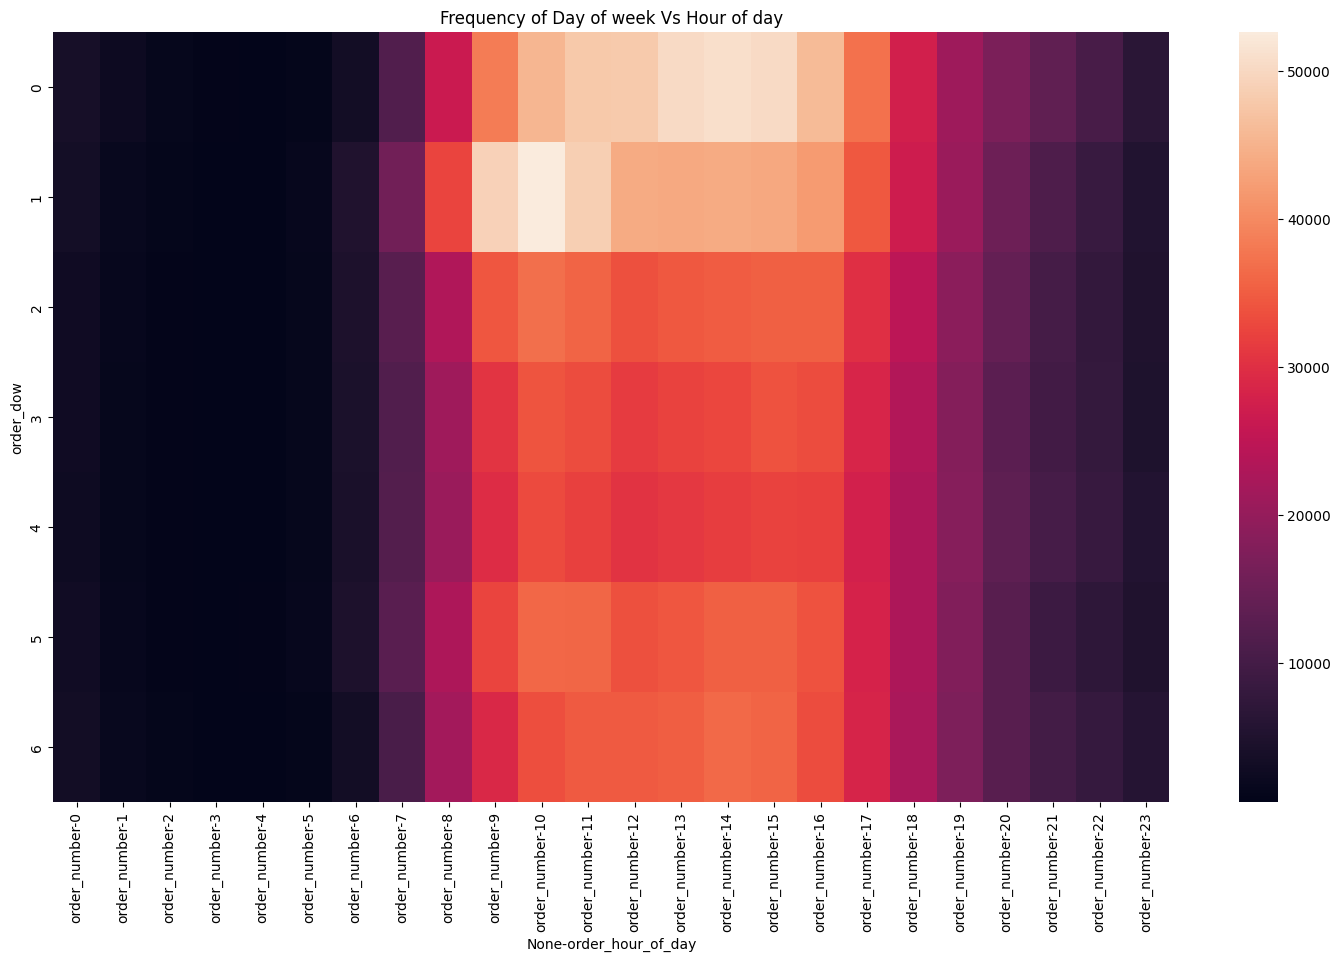

In [30]:
plt.figure(figsize=(18,10))
sns.heatmap(grouped_orders)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

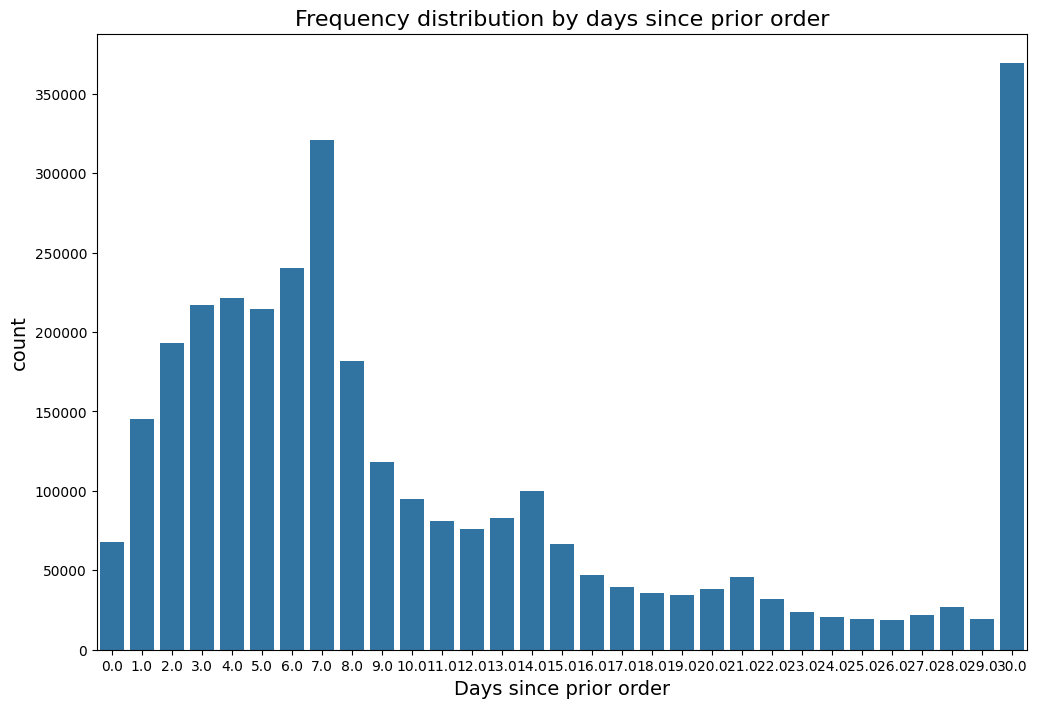

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order",data=orders_new)
plt.ylabel('count',fontsize=14)
plt.xlabel('Days since prior order',fontsize=14)
plt.title("Frequency distribution by days since prior order",fontsize=16)
plt.show()

In [32]:
order_products_prior.reordered.sum()/len(order_products_prior)

0.5896974667922161

In [33]:
order_products_train.reordered.sum() / len(order_products_train)

0.5985944127509629

In [34]:
#merging order_products_prior and products 
op_prior_merged = pd.merge(order_products_prior,products,on="product_id",how='left')

In [35]:
op_prior_merged=pd.merge(op_prior_merged,aisles,on='aisle_id',how='left')

In [36]:
op_prior_merged = pd.merge(op_prior_merged,departments,on='department_id',how='left')

In [37]:
#let's see the merged data
print(len(op_prior_merged))
op_prior_merged.head()

32434489


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [38]:
count_products = op_prior_merged['product_name'].value_counts().reset_index().head(20)
count_products.columns = ['Product_Name','Frequency']
count_products

,Product_Name,Frequency
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


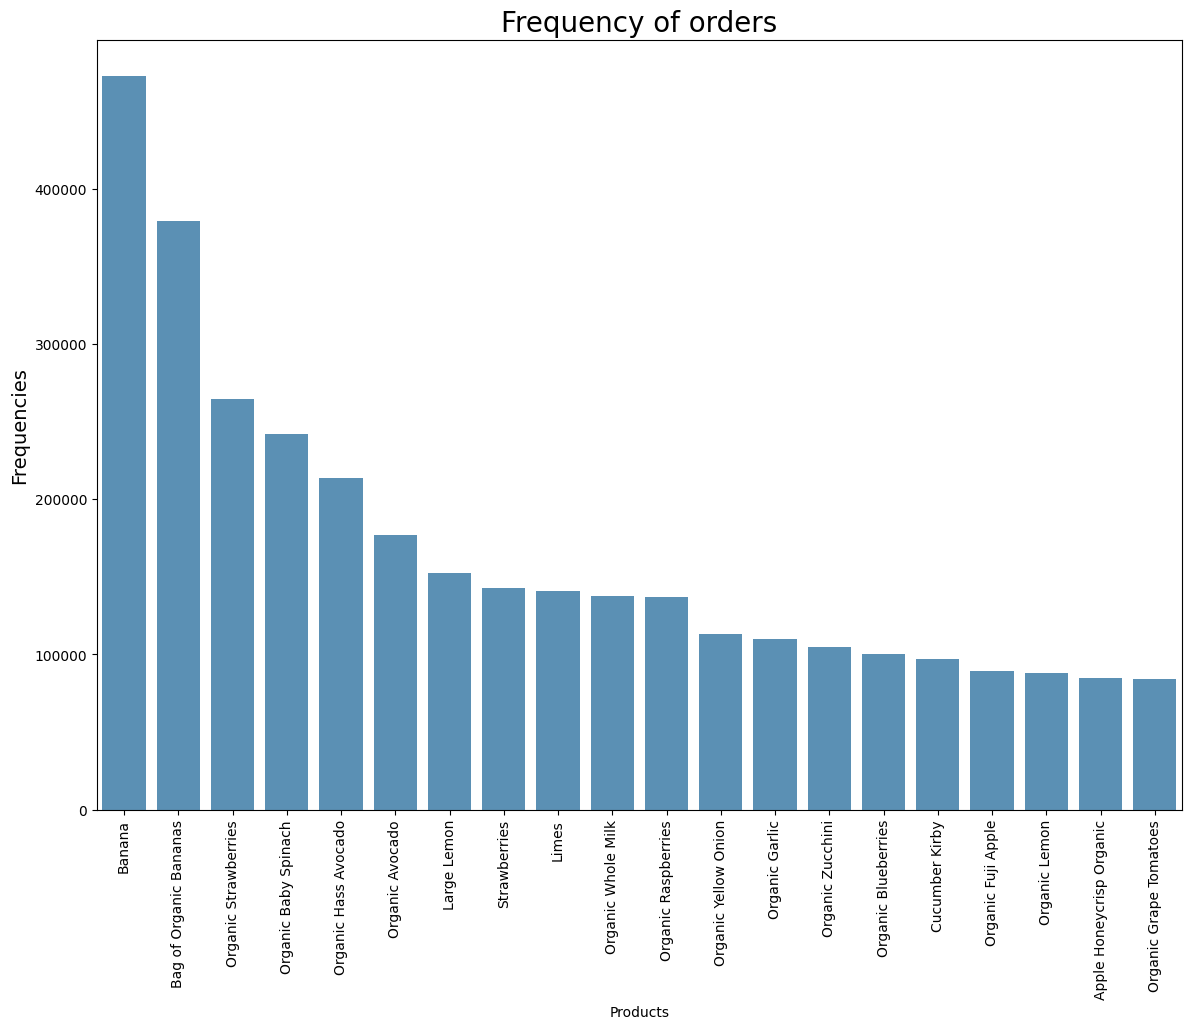

In [39]:
plt.figure(figsize = (14,10))
sns.barplot(x=count_products.Product_Name,y=count_products.Frequency,alpha=0.8)
plt.ylabel("Frequencies",fontsize = 14)
plt.xlabel("Products",fontsize = 10)
plt.xticks(rotation = 'vertical')
plt.title("Frequency of orders",fontsize=20)
plt.show()

In [40]:
count_aisles = op_prior_merged["aisle"].value_counts().head(20)
count_aisles

aisle
fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
Name: count, dtype: int64

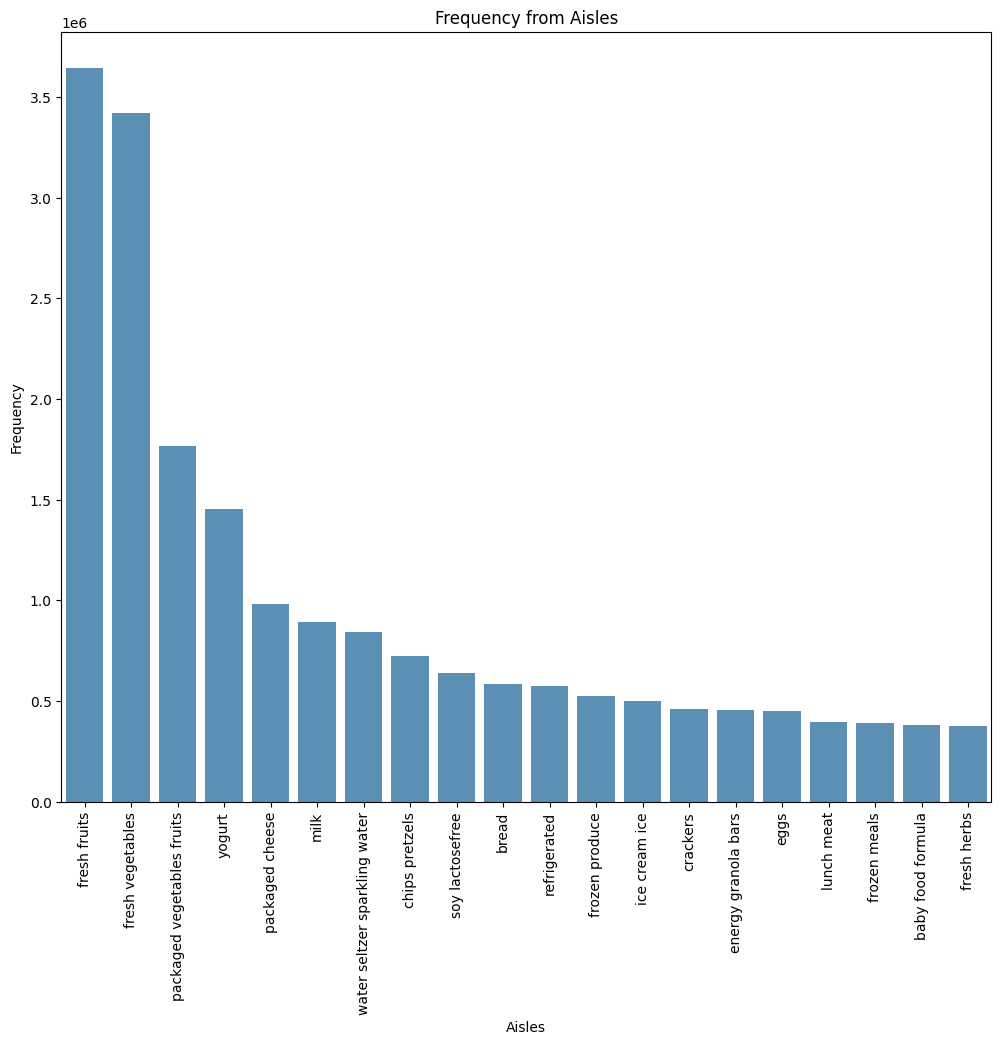

In [41]:
plt.figure(figsize=(12,10))
sns.barplot(x=count_aisles.index,y=count_aisles.values,alpha=0.8)
plt.ylabel("Frequency")
plt.xlabel("Aisles")
plt.xticks(rotation = 'vertical')
plt.title("Frequency from Aisles")
plt.show()

In [42]:
count_dept = op_prior_merged['department'].value_counts()
count_dept

department
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

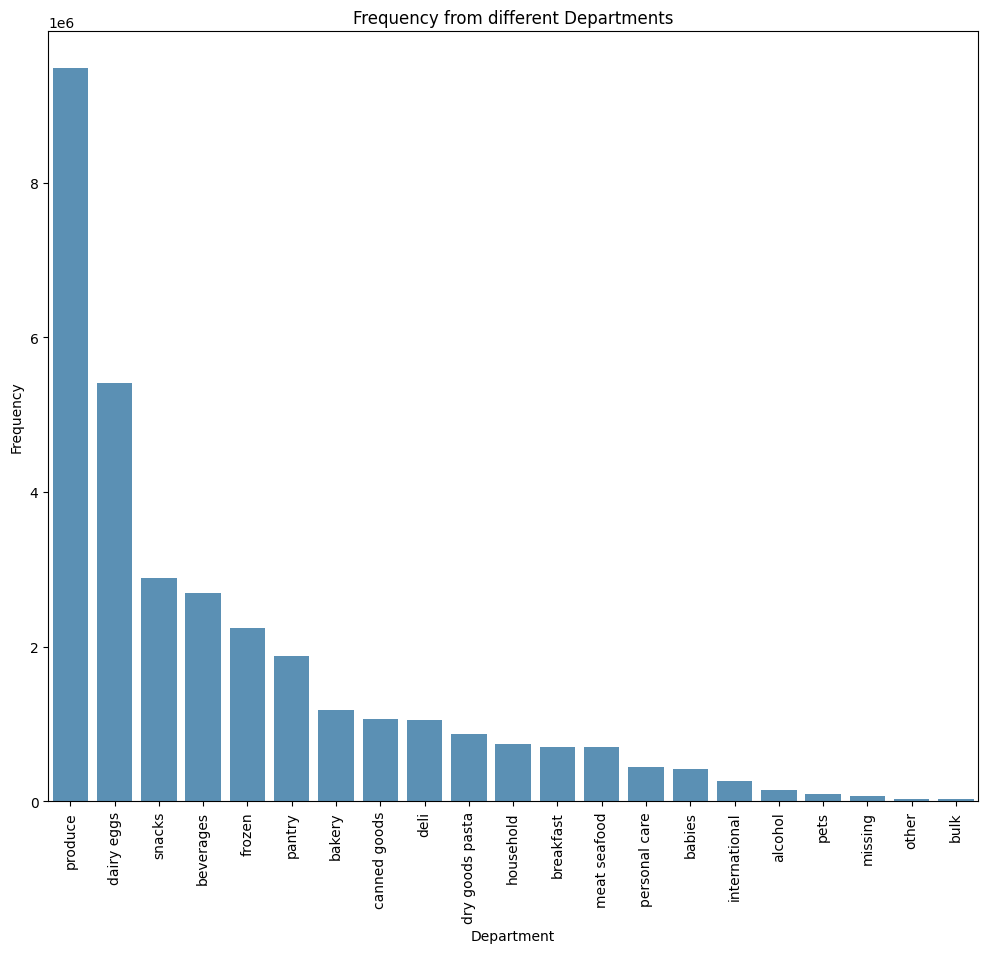

In [43]:
plt.figure(figsize=(12,10))
sns.barplot(x=count_dept.index,y= count_dept.values,alpha=0.8)
plt.xlabel("Department",fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.xticks(rotation="vertical")
plt.title("Frequency from different Departments")
plt.show()

In [44]:
merged_reorders = pd.merge(order_products_prior,orders,on="order_id",how='left')
merged_reorders.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [45]:
count_reordered = merged_reorders['reordered'].value_counts()
count_reordered.index = ["Reordered","Not Reordered"]
count_reordered

Reordered        19126536
Not Reordered    13307953
Name: count, dtype: int64

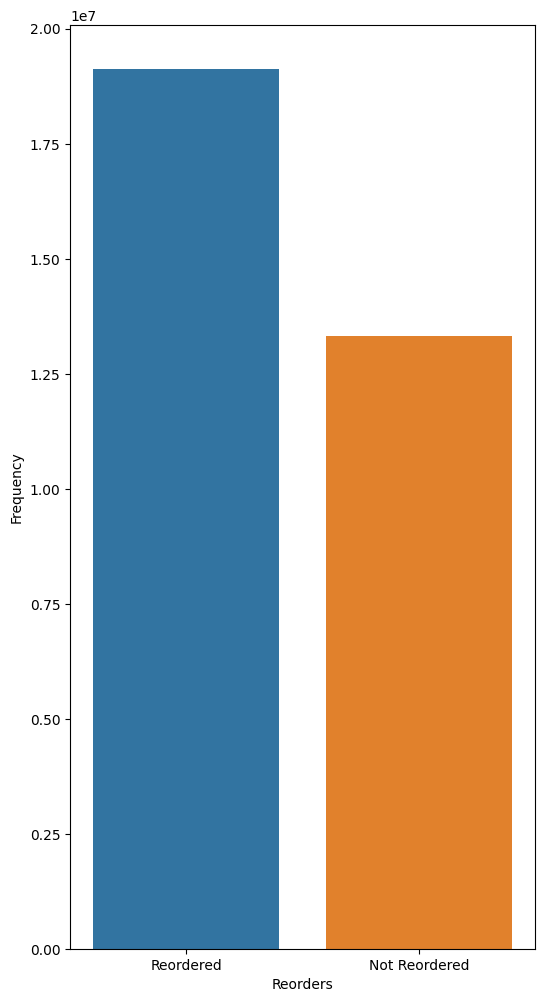

In [46]:
plt.figure(figsize=(6,12))
sns.barplot(x=count_reordered.index,y=count_reordered.values,hue=count_reordered.index)
plt.xlabel('Reorders')
plt.ylabel('Frequency')
plt.show()

In [47]:
grouped_reorders_dow = merged_reorders[merged_reorders["reordered"]==1]
# grouped_reorders_dow.rename({"Order_dow":"Order_day","reordered":"Reordered","Frequency"]
grouped_reorders_dow = grouped_reorders_dow[["order_dow","reordered"]].value_counts().reset_index()
grouped_reorders_dow.columns = ["Order_day","Reordered","Frequency"]
grouped_reorders_dow.sort_values("Order_day",ascending = True,inplace = True)
grouped_reorders_dow.index = range(7)
days = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
x = 0
for day in days:
    grouped_reorders_dow.loc[x,["Order_day"]] = day
    x += 1
grouped_reorders_dow

C:\Users\sagar\AppData\Local\Temp\ipykernel_3432\293896035.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Sunday' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grouped_reorders_dow.loc[x,["Order_day"]] = day


,Order_day,Reordered,Frequency
0,Sunday,1,3634366
1,Monday,1,3421285
2,Tuesday,1,2487537
3,Wednesday,1,2253698
4,Thursday,1,2238166
5,Friday,1,2506649
6,Saturday,1,2584835


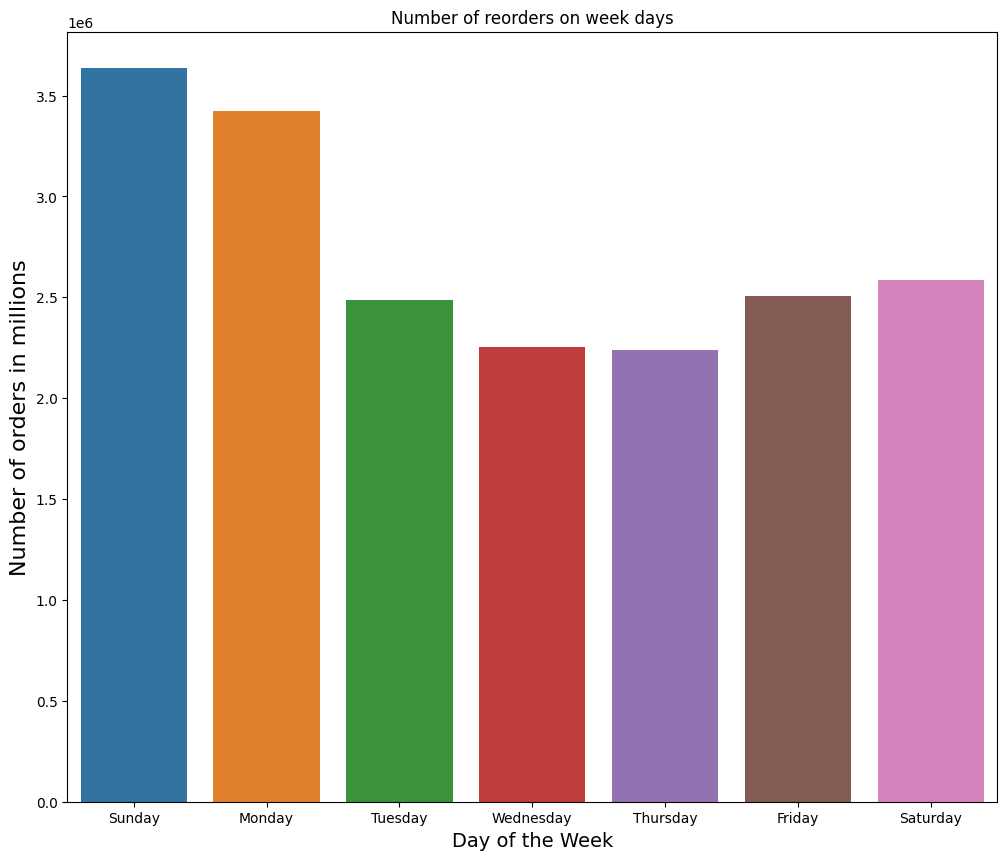

In [48]:
plt.figure(figsize=(12,10))
sns.barplot(x=grouped_reorders_dow.Order_day,y=grouped_reorders_dow.Frequency,hue=grouped_reorders_dow.Order_day)
plt.xlabel("Day of the Week",fontsize=14)
plt.ylabel("Number of orders in millions",fontsize=16)
plt.title("Number of reorders on week days")
plt.show()

In [55]:
grouped_reorders = merged_reorders.groupby(["order_hour_of_day"])["reordered"].aggregate("count").reset_index()
# grouped_reorders.drop(grouped_reord/ers.index)
# grouped_reorders.set_index(grouped_reorders.order_hour_of_day,inplace = True)
# grouped_reorders.drop(["order_hour_of_day"],axis=1,inplace = True)
grouped_reorders.sort_values("reordered",ascending = False,inplace = True)
grouped_reorders.index = range(len(grouped_reorders))
grouped_reorders

,order_hour_of_day,reordered
0,10,2764426
1,11,2738582
2,14,2691548
3,15,2664533
4,13,2663292
5,12,2620847
6,16,2537458
7,9,2456713
8,17,2089465
9,8,1719973


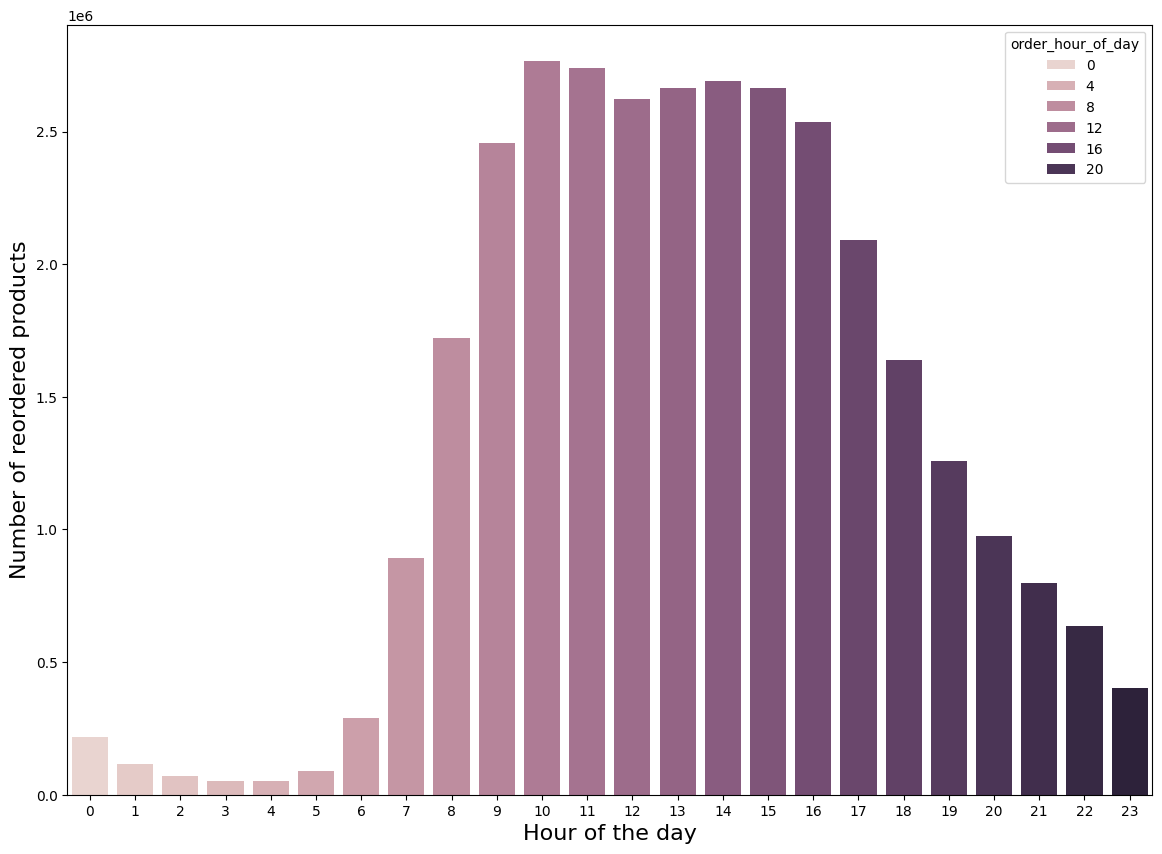

In [51]:
plt.figure(figsize=(14,10))
sns.barplot(x=grouped_reorders.order_hour_of_day,y=grouped_reorders.reordered,hue=grouped_reorders.order_hour_of_day)
plt.xlabel("Hour of the day",fontsize= 16)
plt.ylabel("Number of reordered products",fontsize = 16)
plt.show()